<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/92_DOE_MSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos - 2023: Metodologia de Superficie de Respuesta**
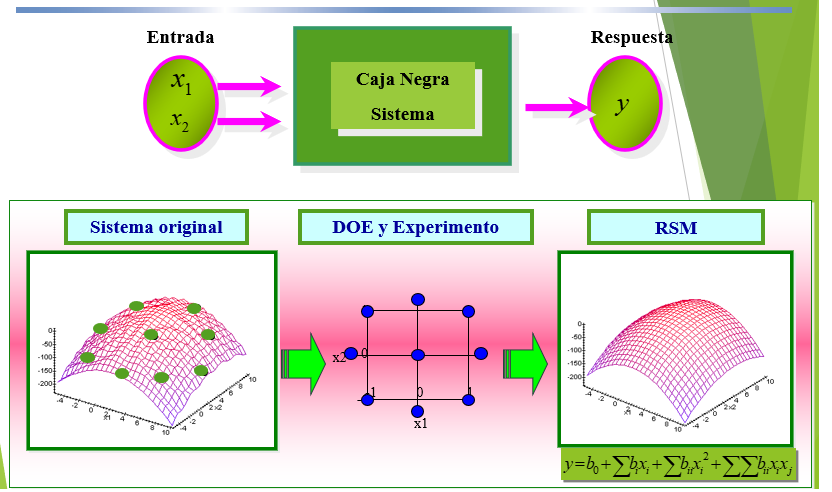


# **Paso 1. Problema de aplicación:**
## **Problema: Un ingeniero químico está interesado en determinar lascondiciones de operación que maximizan el rendimiento de un  proceso. Dos variables controlables influyen en el rendimiento  del proceso: A: tiempo de reacción y B: temperatura de reacción. El ingeniero opera actualmente el proceso con un tiempo de  reacción de 35 minutos y una temperatura de 155°F, que dan como resultado rendimientos de cerca de 40%. Puesto que es improbable que esta región contenga el óptimo, el ingeniero ajusta un modelo de primer orden y aplica el método del         ascenso más pronunciado. El ingeniero decide que la región de  exploración para ajustar el modelo de primer orden deberá ser (30,40) minutos de tiempo de reacción y (150,160)°F.**

+ El diseño experimental se muestra en la siguiente tabla. Observe que el diseño usado para recabar estos datos  es un factorial $2²$ aumentado con cinco puntos centrales.
+ Las réplicas del centro se usan para estimar el error experimental y permitir la verificación de la   adecuación del modelo de primer orden.
+ Además, el está centrado alrededor de las condiciones  de operación actuales del proceso.



|Tiempo |	Temperatura  |	Rendimiento |
|:--:|:--:|:--:|
|30|	150|	39.3|
|40|	150|	40.9|
|30 |	160|	40|
|40 |	160|	41.5|
|35|	155|	40.3|
|35|	155|	40.5|
|35|	155|	40.7|
|35|	155|	40.2|
|35|	155|	40.6|




# **Paso_2. Librerias a usar**

In [1]:
import pandas as pd
import numpy as np                    ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R

# **Paso_3. Los Datos al inicio**

## **a1. Ingresando los datos del problema a Python**

In [2]:
Tiempo1 = [30,	40,	30,	40,	35,	35,	35,	35,	35]
Temperatura1 = [150,	150,	160,	160,	155,	155,	155,	155,	155]
Rendimiento1 = [39.3,	40.9,	40,	41.5,	40.3,	40.5,	40.7,	40.2,	40.6]


## **a2. El DataFrame inical**

In [3]:
datos1  = pd.DataFrame({ 'x1': Tiempo1,    'y1': Temperatura1,  'z1': Rendimiento1})
datos1

,x1,y1,z1
0,30,150,39.3
1,40,150,40.9
2,30,160,40.0
3,40,160,41.5
4,35,155,40.3
5,35,155,40.5
6,35,155,40.7
7,35,155,40.2
8,35,155,40.6


# **a3. El scatterplot inicial**

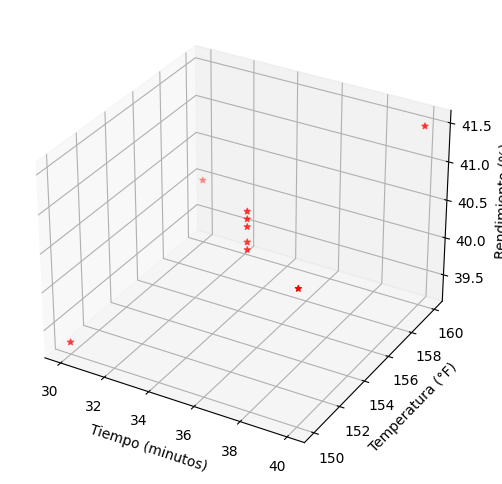

In [4]:
import matplotlib.pyplot as plt             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
#import random                             # Permiten obtener de distintos modos números aleatorios

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection ="3d")

x1 = datos1["x1"]                             # Datos eje X
y1 = datos1["y1"]                             # Datos eje Y
z1 = datos1['z1']                               # Datos eje Z (Var. Respuesta)

ax.scatter3D(x1, y1, z1, marker='*', c='r')
ax.set_xlabel('Tiempo (minutos)')        # Etiqueta del eje X
ax.set_ylabel('Temperatura (°F)')       # Etiqueta del eje Y
ax.set_zlabel('Rendimiento (%)')
plt.show()

# **a4. El Modelo de regresión lineal**

In [5]:
mod1 = sm.OLS.from_formula('z1 ~ (x1+y1)**2', data=datos1).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                     z1   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     26.97
Date:                Wed, 20 Sep 2023   Prob (F-statistic):            0.00163
Time:                        12:57:44   Log-Likelihood:                 4.9676
No. Observations:                   9   AIC:                            -1.935
Df Residuals:                       5   BIC:                            -1.146
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5194     20.499      0.952      0.3

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **a5. Parámetros del Modelo de regresión lineal**

In [6]:
mod1.params

Intercept    19.519444
x1            0.310000
y1            0.100000
x1:y1        -0.001000
dtype: float64

# **a6. El Modelo Anova del Modelo de regresión lineal - Forma 1**

In [7]:
anova_result = sm.stats.anova_lm(mod1, typ=1)
print (anova_result)

           df    sum_sq   mean_sq          F    PR(>F)
x1        1.0  2.402500  2.402500  68.751987  0.000417
y1        1.0  0.422500  0.422500  12.090620  0.017713
x1:y1     1.0  0.002500  0.002500   0.071542  0.799787
Residual  5.0  0.174722  0.034944        NaN       NaN


# **a6. El Modelo Anova del Modelo de regresión lineal - Forma 2**

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model2 = ols('z1 ~ x1*y1', data = datos1).fit()

anova_result2 = sm.stats.anova_lm(model2, typ=1)
print (anova_result2)

           df    sum_sq   mean_sq          F    PR(>F)
x1        1.0  2.402500  2.402500  68.751987  0.000417
y1        1.0  0.422500  0.422500  12.090620  0.017713
x1:y1     1.0  0.002500  0.002500   0.071542  0.799787
Residual  5.0  0.174722  0.034944        NaN       NaN


In [9]:
model2.params

Intercept    19.519444
x1            0.310000
y1            0.100000
x1:y1        -0.001000
dtype: float64

# **Paso_4. Replanteamos los datos para encontrar el mejor óptimo**

+ Las nuevas observaciones


|Tiempo |	Temperatura  |	Rendimiento |
|:--:|:--:|:--:|
|80|	170|	76.5|
|90|	170|	78|
|80 |	180|	77|
|90|	180|	79.5|
|77.93|	175|	75.6|
|92.07|	175|	78.4|
|85|	167.93|	77|
|85|	182.07|	78.5|
|85|	175|	79.9|
|85|	175	|80.3	|
|85|	175|	80|
|85	|175	|79.7	|
|85|	175|	79.8|




## **a. Los datos y el DataFrame**

In [10]:
Tiempo = [80,	90,	80,	90,	77.93,	92.07,	85,	85,	85,	85,	85,	85,	85]
Temperatura = [170,	170,	180,	180,	175,	175,	167.93,	182.07,	175,	175,	175,	175,	175]
Rendimiento = [76.5,	78,	77,	79.5,	75.6,	78.4,	77.0,	78.5,	79.9,	80.3,	80,	79.7,	79.8]




In [11]:
datos  = pd.DataFrame({ 'x': Tiempo,    'y': Temperatura,  'z': Rendimiento})

In [12]:
datos

,x,y,z
0,80.00,170.00,76.5
1,90.00,170.00,78.0
2,80.00,180.00,77.0
3,90.00,180.00,79.5
4,77.93,175.00,75.6
5,92.07,175.00,78.4
6,85.00,167.93,77.0
7,85.00,182.07,78.5
8,85.00,175.00,79.9
9,85.00,175.00,80.3


## **Paso_b. Diagrama de dispersión**


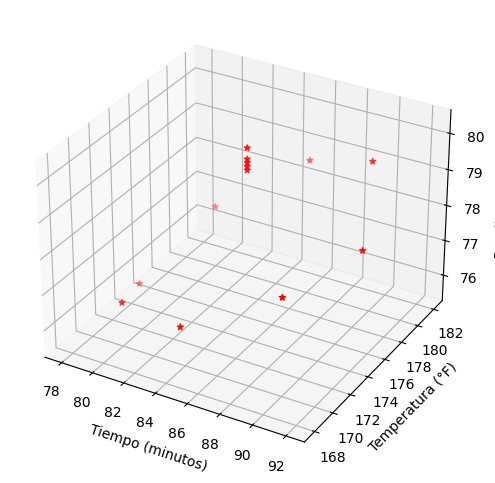

In [13]:
import matplotlib.pyplot as plt             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
#import random                             # Permiten obtener de distintos modos números aleatorios

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection ="3d")

x = datos["x"]                             # Datos eje X
y = datos["y"]                             # Datos eje Y
z = datos['z']                               # Datos eje Z (Var. Respuesta)

ax.scatter3D(x, y, z, marker='*', c='r')
ax.set_xlabel('Tiempo (minutos)')        # Etiqueta del eje X
ax.set_ylabel('Temperatura (°F)')       # Etiqueta del eje Y
ax.set_zlabel('Rendimiento (%)')
plt.show()

# **c. Ajustamos el modelo de regresión**

In [14]:
mod = sm.OLS.from_formula('z ~ x*y + np.power(x,2) + np.power(y,2)', data=datos).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores

# **Paso_d.Resumen del modelo ajustado**

In [15]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     79.67
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           5.15e-06
Time:                        12:57:44   Log-Likelihood:                 2.7787
No. Observations:                  13   AIC:                             6.443
Df Residuals:                       7   BIC:                             9.832
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1430.6884    152.851     -9.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **Paso_5. Extraer los  $β$  estimados**

In [16]:
mod.params

Intercept        -1430.688438
x                    7.808865
y                   13.271745
x:y                  0.010000
np.power(x, 2)      -0.055058
np.power(y, 2)      -0.040053
dtype: float64

In [17]:
!pip install texttable
from texttable import Texttable
t1 = Texttable()

In [18]:
b0, b1, b2, b12, b11, b22 = mod.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi' ],
           ['b0',	b0],
           ['b1',	b1],
           ['b2',	b2],
           ['b12',b12],
           ['b11',b11],
           ['b22',b22]])
print(t1.draw())

print(f'El modelo estimado es z = f(x,y)= {round(b0,3)}+{round(b1,3)}x+{round(b2,3)}y+{round(b12,3)}xy+{round(b11,2)}x^2+{round(b22,3)}y^2')

+----------------+-------------+
| Parametro = bi | valor de bi |
+================+=============+
| b0             | -1430.688   |
+----------------+-------------+
| b1             | 7.809       |
+----------------+-------------+
| b2             | 13.272      |
+----------------+-------------+
| b12            | 0.010       |
+----------------+-------------+
| b11            | -0.055      |
+----------------+-------------+
| b22            | -0.040      |
+----------------+-------------+
El modelo estimado es z = f(x,y)= -1430.688+7.809x+13.272y+0.01xy+-0.06x^2+-0.04y^2


# **Paso_6. El CME del error o  $σ^2$ estimado:**

In [19]:
print(f'La varianza estimada del modelo es CME = mod.mse_resid = {mod.mse_resid}')

La varianza estimada del modelo es CME = mod.mse_resid = 0.0709104990894393


# **Paso_7. La gráfica de la superficie de REspuesta estimada**

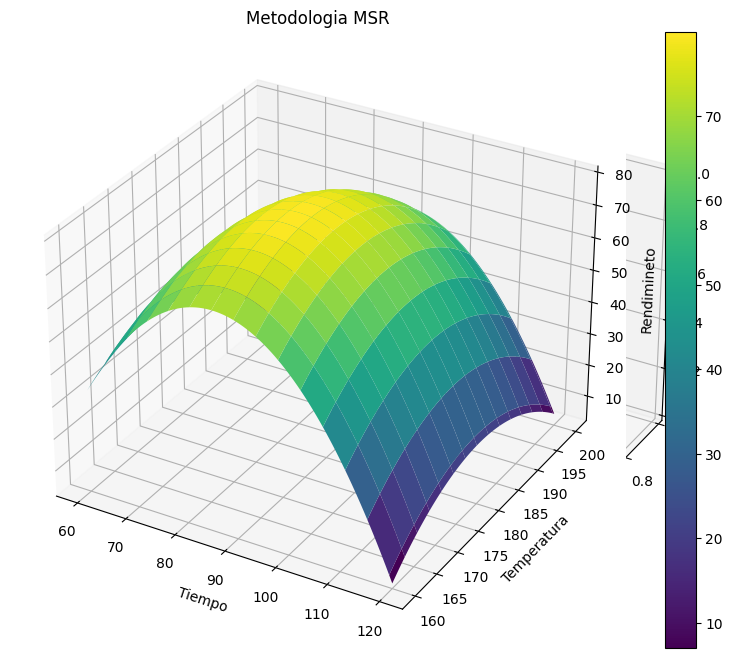

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,8))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(60,120,100)
ydata = np.linspace(160,200,100)
X,Y = np.meshgrid(xdata,ydata)
Z = b0 + b1*X + b2*Y + b12*X*Y + b11*X**2 + b22*Y**2

ax3d = plt.axes(projection='3d')
surf=ax3d.plot_surface(X, Y, Z, rstride=7, cstride=7, cmap="viridis")
fig.colorbar(surf, ax=ax3d)
ax3d.set_title('Metodologia MSR')
ax3d.set_xlabel('Tiempo')
ax3d.set_ylabel('Temperatura')
ax3d.set_zlabel('Rendimineto')

plt.savefig("Customized Surface Plot.png")

plt.show()

# **La superficie de respuesta en Statgraphics**

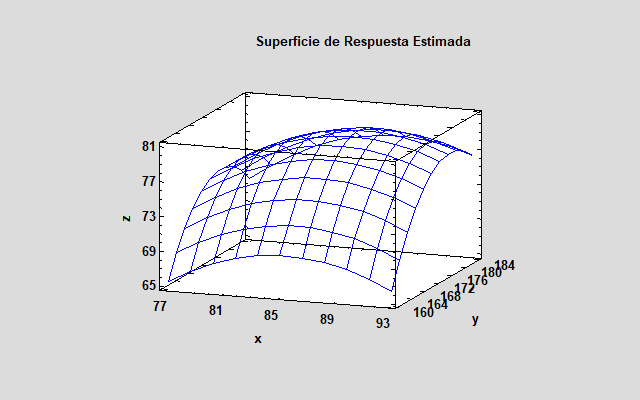

# **Gráfica de Contornos en Statgraphics**

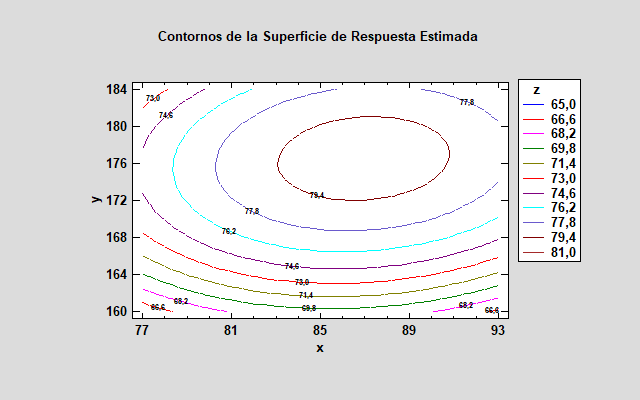

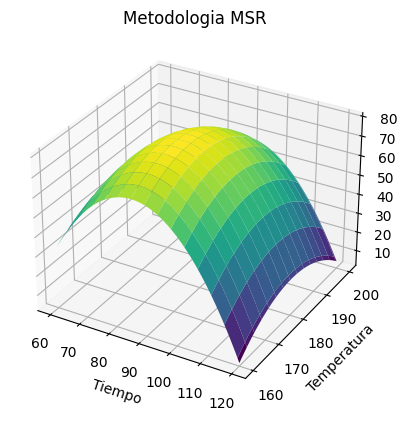

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def fun(x,y):
  return b0 + b1*x + b2*y + b12*x*y + b11*x**2 + b22*y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x =  np.linspace(60,120,100)
y = np.linspace(160,200,100)

X,Y = np.meshgrid(x,y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X,Y,Z, rstride=7, cstride=7, cmap="viridis")


ax.set_title('Metodologia MSR')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Temperatura')
ax.set_zlabel('Rendimineto')

plt.show()

# **Paso_8. Encontrando el Máximo rendimiento**

In [22]:
from scipy.optimize import minimize

def f(x): # Definimos una funcion de una variable x = x[0], y = x[1]
  fun = b0 + b1*x[0] + b2*x[1] + b12*x[0]*x[1] + b11*x[0]**2 + b22*x[1]**2
  return fun

res = minimize(lambda x: f(x), (35,155))
print('El Rendimiento Minimo {} encontrado en el punto {}'.format(res.fun, res.x))

res = minimize(lambda x: -f(x), (35,155) )
print('El Rendimiento Máximo es {}% encontrado en el punto {}'.format(-res.fun, res.x))

El Rendimiento Minimo -61827.915992370195 encontrado en el punto [-975.30989713  -66.1928782 ]
El Rendimiento Máximo es 80.21239303589664% encontrado en el punto [ 86.94615883 176.52930829]


# **Paso_8. Encontrando el Máximo rendimiento - Usando Statgraphics**

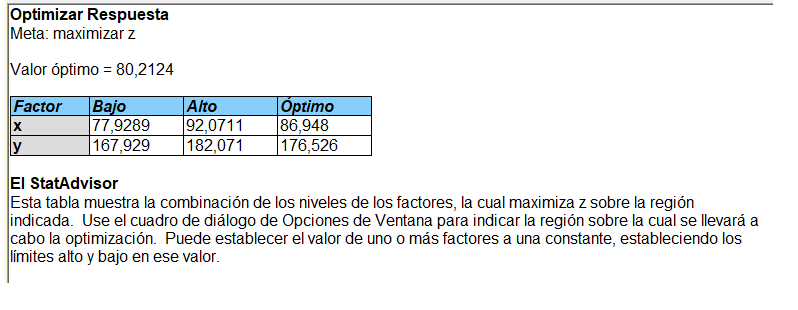

# **Como graficar una superficie en python**

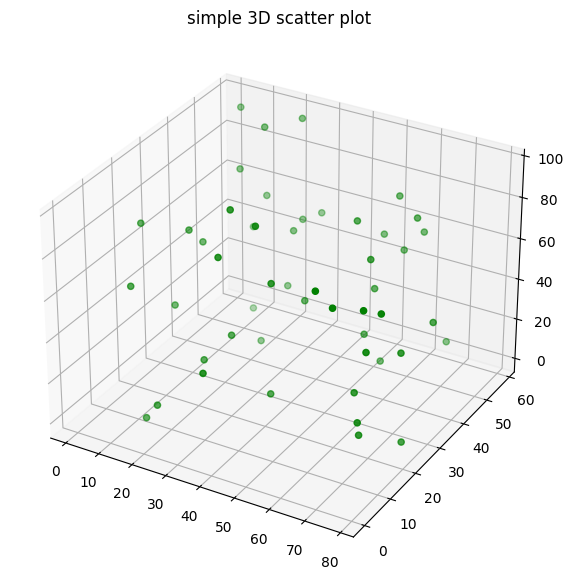

In [23]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
z = np.random.randint(100, size =(50))
x = np.random.randint(80, size =(50))
y = np.random.randint(60, size =(50))

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")

# show plot
plt.show()